In [1]:
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier

In [92]:
df = pd.read_csv('../data/clean-dataset.csv')

In [93]:
print(df.shape)
df.head(10)

(14092, 10)


,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,0,61.0,0,0,2,35.54,8.8,240,1
1,1,0,63.0,0,0,0,33.63,3.5,130,0
2,2,0,68.0,1,0,2,42.73,6.8,200,1
3,3,0,60.0,0,0,1,28.62,5.8,145,0
4,4,1,58.0,0,0,0,25.70,6.5,126,0
5,5,0,61.0,1,0,0,38.95,6.0,155,1
6,6,0,40.0,0,0,0,27.32,6.0,155,0
7,7,1,59.0,0,0,2,27.32,6.1,140,1
8,8,1,66.0,0,0,2,37.86,5.8,145,1
9,9,0,54.0,0,0,2,28.90,6.5,160,1


# Training

In [94]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.25)

In [96]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
model = LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5318, number of negative: 5251
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 10569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503170 -> initscore=0.012679
[LightGBM] [Info] Start training from score 0.012679


LGBMClassifier()

In [98]:
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print('The Accuracy is:',accuracy*100,'%')

The Accuracy is: 90.86006244677831 %


In [99]:
report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9086006244677831
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1795
           1       0.89      0.92      0.91      1728

    accuracy                           0.91      3523
   macro avg       0.91      0.91      0.91      3523
weighted avg       0.91      0.91      0.91      3523

Confusion Matrix:
[[1605  190]
 [ 132 1596]]


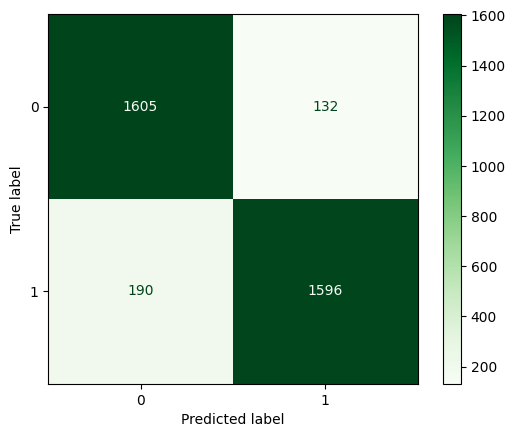

In [100]:
cm = confusion_matrix(pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm);
disp.plot(cmap='Greens')